In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Scaling the features so that no single feature dominates the clustering process.
# So using Standard Scaler to fit the data which can be plotted on a scale
scaler = sklearn.preprocessing.StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
kmeans = KMeans(n_clusters =3, random_state=1, n_init='auto')
kmeans.fit(scaled_X)
cluster_labels = kmeans.labels_

In [9]:
df["clusters"] = cluster_labels
# Cross tab compares the newly added clusters to the species label here for this data set specifically
cross_tab = pd.crosstab(df["clusters"], df["species"])
cross_tab

species,setosa,versicolor,virginica
clusters,,,
0,1,37,8
1,49,0,0
2,0,13,42


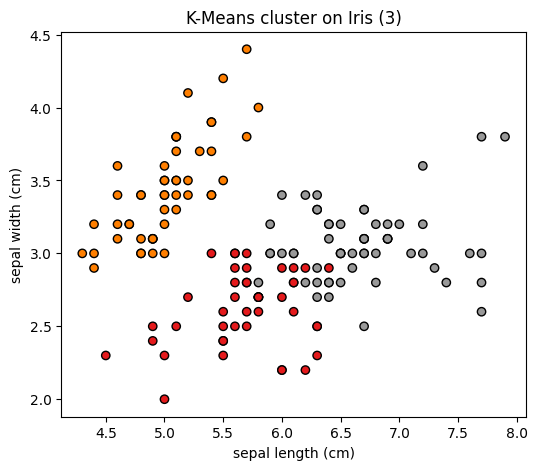

In [11]:
plt.figure(figsize=(6,5))
plt.scatter(df["sepal_length"],
            df["sepal_width"],
            c=df["clusters"],
            cmap=plt.cm.Set1,
            edgecolor="k")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("K-Means cluster on Iris (3)")
plt.show()